# <font color='orange'> <center> LAB 6 <br> Principal Component Analysis

<div style="font-family:verdana; word-spacing:1.7px;">
The dataset involved first started with 24 mammograms with a known cancer diagnosis that were scanned. The images were then pre-processed using image segmentation computer vision algorithms to extract candidate objects from the mammogram images. Once segmented, the objects were then manually labeled by an experienced radiologist. A total of 29 features were extracted from the segmented objects thought to be most relevant to pattern recognition, which was reduced to 18, then finally to six, as follows :<ul>
    <li>Area of object (in pixels).
    <li>Average gray level of the object.
    <li>Gradient strength of the object’s perimeter pixels.
    <li>Root mean square noise fluctuation in the object.
    <li>Contrast, average gray level of the object minus the average of a two-pixel wide border surrounding the object.
    <li>A low order moment based on shape descriptor.
    </ul>
There are two classes and the goal is to distinguish between microcalcifications and non-
microcalcifications using the features for a given segmented object.
</div>

            Non-microcalcifications: negative case, or majority class.
            Microcalcifications: positive case, or minority class.
    


<font color='orange'><h3><center>Part 1</center></h3>

Download the mammography dataset given. Implement PCA. Find the first two principal components of the dataset and plot it using scatter plot with different colors for each target. Dataset is obtained from https://www.openml.org/d/310
What are your interpretations?

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Importing librarys to use on interactive graphs
import plotly.offline as plty
from plotly import tools
import plotly.express as px
from sklearn.metrics import confusion_matrix, classification_report

# to set a style to all graphs
plt.style.use('fivethirtyeight')
sns.set_style("darkgrid")
plt.figure(facecolor='w')
%matplotlib inline

<font color='orange'><h3><center>1. Reading Data</center></h3>

In [2]:
FILE_PATH = 'mammography.csv'
data_df = pd.read_csv(FILE_PATH)
data_df.head(5)

,attr1,attr2,attr3,attr4,attr5,attr6,class
0,0.230020,5.072578,-0.276061,0.832444,-0.377866,0.480322,'-1'
1,0.155491,-0.169390,0.670652,-0.859553,-0.377866,-0.945723,'-1'
2,-0.784415,-0.443654,5.674705,-0.859553,-0.377866,-0.945723,'-1'
3,0.546088,0.131415,-0.456387,-0.859553,-0.377866,-0.945723,'-1'
4,-0.102987,-0.394994,-0.140816,0.979703,-0.377866,1.013566,'-1'


<font color='orange'><h3><center>2. Exploring Data</center></h3>

<Figure size 432x288 with 0 Axes>

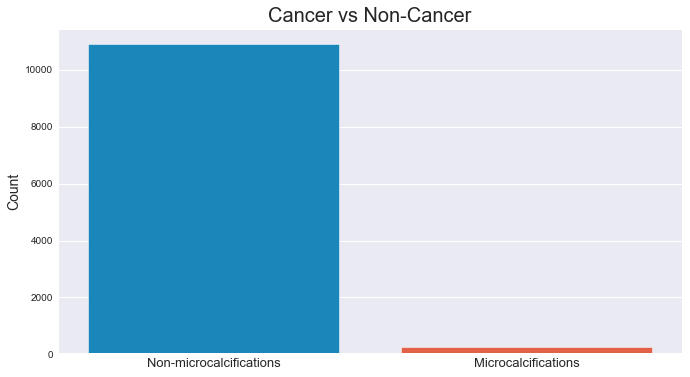

In [3]:
sns.set_style("darkgrid")
plt.figure(facecolor='w')
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
_ = sns.countplot(data_df['class'], ax=ax)
_ = ax.set_title('Cancer vs Non-Cancer', fontsize=20)
_ = ax.set_ylabel('Count', fontsize=14)
_ = ax.set_xlabel('')
_ = ax.set_xticklabels(['Non-microcalcifications','Microcalcifications'], fontsize=13)

<Figure size 432x288 with 0 Axes>

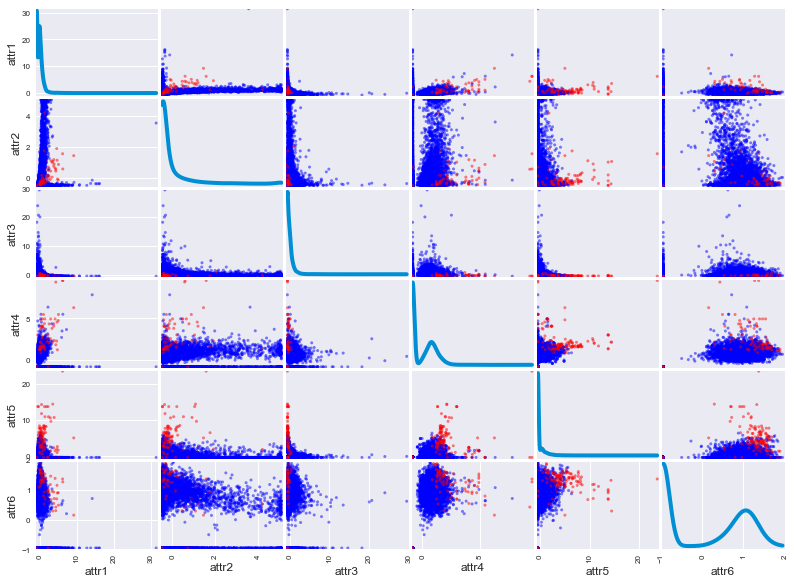

In [4]:
sns.set_style("darkgrid")
plt.figure(facecolor='w')
color_dict = {"'-1'":'blue', "'1'":'red'}
# map each row to a color based on the class value 
colors = [color_dict[str(x)] for x in data_df.values[:, -1]] 
    # pairwise scatter plots of all numerical variables 
_ = scatter_matrix(data_df, diagonal='kde', color=colors,figsize=(12,10)) 
_ = plt.show()

<div style="font-family:verdana; word-spacing:1.9px;">
We can see that the distributions for many variables do differ for the two-class labels, suggesting that some reasonable discrimination between the cancer and no cancer cases will be feasible.
    </div>

In [5]:
X = data_df.values[:,:-1]
y = data_df.values[:,-1]

encoder = LabelEncoder()
y = encoder.fit_transform(y)

<font color='orange'><h3><center>3. Applying PCA</center></h3>

In [6]:
train_f, test_f, train_c, test_c=train_test_split(X, y, test_size=0.2, random_state=0)

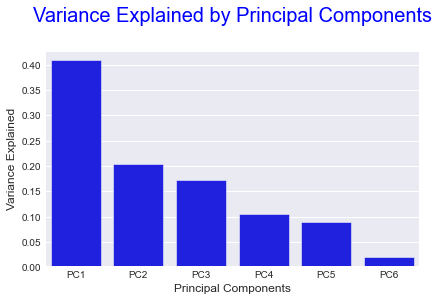

In [7]:
from sklearn.decomposition import PCA
pca=PCA()
train_f_pca=pca.fit_transform(train_f)
test_f_pca=pca.transform(test_f)
sns.set_style("darkgrid")
plt.figure(facecolor='w')
df = pd.DataFrame({'Variance Explained':pca.explained_variance_ratio_,
             'Principal Components':['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6']})
sns.barplot(x='Principal Components',y="Variance Explained", data=df, color="b")
plt.title("Variance Explained by Principal Components\n", fontsize=20, color="b")
plt.show()

In [8]:
df

,Variance Explained,Principal Components
0,0.409203,PC1
1,0.203176,PC2
2,0.172670,PC3
3,0.104946,PC4
4,0.089452,PC5
5,0.020553,PC6


In [9]:
print("Explained variance per component:")
pca.explained_variance_ratio_.tolist()

Explained variance per component:


[0.4092029580320258,
 0.20317553701092267,
 0.1726704910857947,
 0.10494638493272956,
 0.08945211076740177,
 0.020552518171125446]

#### As more than 90% of the data variance is explained with four components, let's consider those components to create model

In [10]:
full_X =X
X= X[:, [1, 2, 3, 4]]
train_f, test_f, train_c, test_c=train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
pca2 = PCA(4)  # project from 4 to 2 dimensions
train_f_pca2=pca2.fit_transform(train_f)
test_f_pca2=pca2.transform(test_f)

In [12]:
classifier1 = LogisticRegression(solver="liblinear", random_state=0)
classifier1.fit(train_f_pca2, train_c)
pred_c1 = classifier1.predict(test_f_pca2)

In [13]:
classifier2 = RandomForestClassifier(max_depth=3, n_estimators=100)
classifier2.fit(train_f_pca2, train_c)
pred_c2 = classifier2.predict(test_f_pca2)

In [14]:
def print_accuracy(X_train, y_train, X_test, y_test, model, model_name):
    divider = "-"*120
    predicted = model.predict(X_test)
    train_acc_scr = model.score(X_train, y_train)
    print("Train Accuracy Score of "+model_name+" model created using stemmed tf_idf vector is:\n", train_acc_scr)
    print(divider)
    val_acc_scr = model.score(X_test, y_test)
    print("Test Accuracy Score of "+model_name+" model created using stemmed tf_idf vector is:\n", val_acc_scr)
    print(divider)
    confusion_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
    print("Confusion Matrix:")
    print(confusion_mat)
    sns.heatmap(confusion_mat, annot=True,fmt="d",cmap=plt.cm.Accent)
    plt.title('Confusion Matrix of '+model_name+' Model', fontsize = 20)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.show()
    print(divider)
    print(classification_report(y_test, predicted))
    return model, [train_acc_scr, val_acc_scr]

Train Accuracy Score of Logistic Regression model created using stemmed tf_idf vector is:
 0.9839034205231388
------------------------------------------------------------------------------------------------------------------------
Test Accuracy Score of Logistic Regression model created using stemmed tf_idf vector is:
 0.9776486365668305
------------------------------------------------------------------------------------------------------------------------
Confusion Matrix:
[[2184    0]
 [  50    3]]


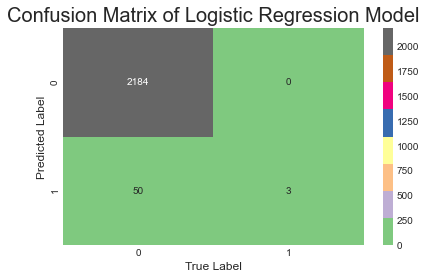

------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2184
           1       1.00      0.06      0.11        53

    accuracy                           0.98      2237
   macro avg       0.99      0.53      0.55      2237
weighted avg       0.98      0.98      0.97      2237



(LogisticRegression(random_state=0, solver='liblinear'),
 [0.9839034205231388, 0.9776486365668305])

In [15]:
print_accuracy(train_f_pca2, train_c, test_f, test_c, classifier1, "Logistic Regression")

Train Accuracy Score of Random Forest Classifier model created using stemmed tf_idf vector is:
 0.9853565839481332
------------------------------------------------------------------------------------------------------------------------
Test Accuracy Score of Random Forest Classifier model created using stemmed tf_idf vector is:
 0.9763075547608404
------------------------------------------------------------------------------------------------------------------------
Confusion Matrix:
[[2184    0]
 [  53    0]]


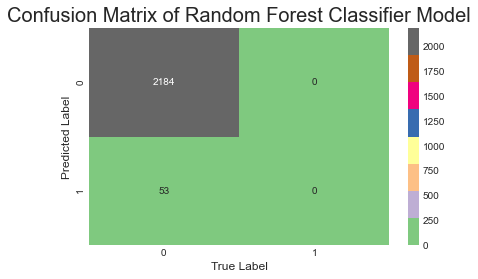

------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2184
           1       0.00      0.00      0.00        53

    accuracy                           0.98      2237
   macro avg       0.49      0.50      0.49      2237
weighted avg       0.95      0.98      0.96      2237



(RandomForestClassifier(max_depth=3), [0.9853565839481332, 0.9763075547608404])

In [16]:
print_accuracy(train_f_pca2, train_c, test_f, test_c, classifier2, "Random Forest Classifier")

As we can see accuracy is 98%, we can use 4 PCA features instead of 6 features

<font color='orange'><h3><center>Part 2</center></h3>

Download the image “bird.png”. Apply PCA and find the optimal number of components required to compress it to reconstruct the original image with less errors. Plot following graph.
Graph with ‘x’ axis to be number of PCs and ‘y’ axis to be the reconstruction error.

(731, 1024, 3)


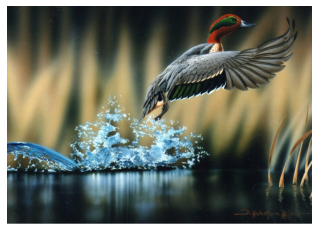

In [17]:
import matplotlib.image as mpimg 
img = mpimg.imread('bird.png', format="PNG") #Now, let's look at the size of this numpy array object img as well as plot it using imshow. 
print(img.shape)
plt.axis('off') 
plt.imshow(img)

In [18]:
#Okay, so the array has 731 rows each of pixel 1024*3. Let's reshape it into a format that PCA can understand. # 2988 = 996 * 3 
img_r = np.reshape(img, (731, 1024*3)) 
print(img_r.shape)

(731, 3072)


In [19]:
# Great, now lets run RandomizedPCA with 64 components (8x8 pixels) and transform the image.
from sklearn.decomposition import PCA as RandomizedPCA
ipca = RandomizedPCA(64).fit(img_r)
img_c = ipca.transform(img_r)
print(img_c.shape)
print(np.sum(ipca.explained_variance_ratio_))

#Great, looks like with 64 components we can explain about 97% of the variance.

(731, 64)
0.9740325388448481


In [20]:
#OK, now to visualize how PCA has performed this compression, let's inverse transform the PCA output and #reshape for visualization using imshow. 
temp = ipca.inverse_transform(img_c) 
print(temp.shape) #reshaping 2988 back to the original 996 * 3 
temp = np.reshape(temp, (731,1024,3)) 
print(temp.shape)

(731, 3072)
(731, 1024, 3)


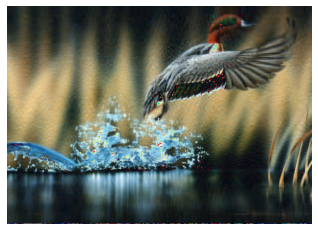

In [21]:
#Great, now lets visualize like before with imshow 
plt.axis('off')
plt.imshow(temp.astype('uint8'))

<Figure size 432x288 with 0 Axes>

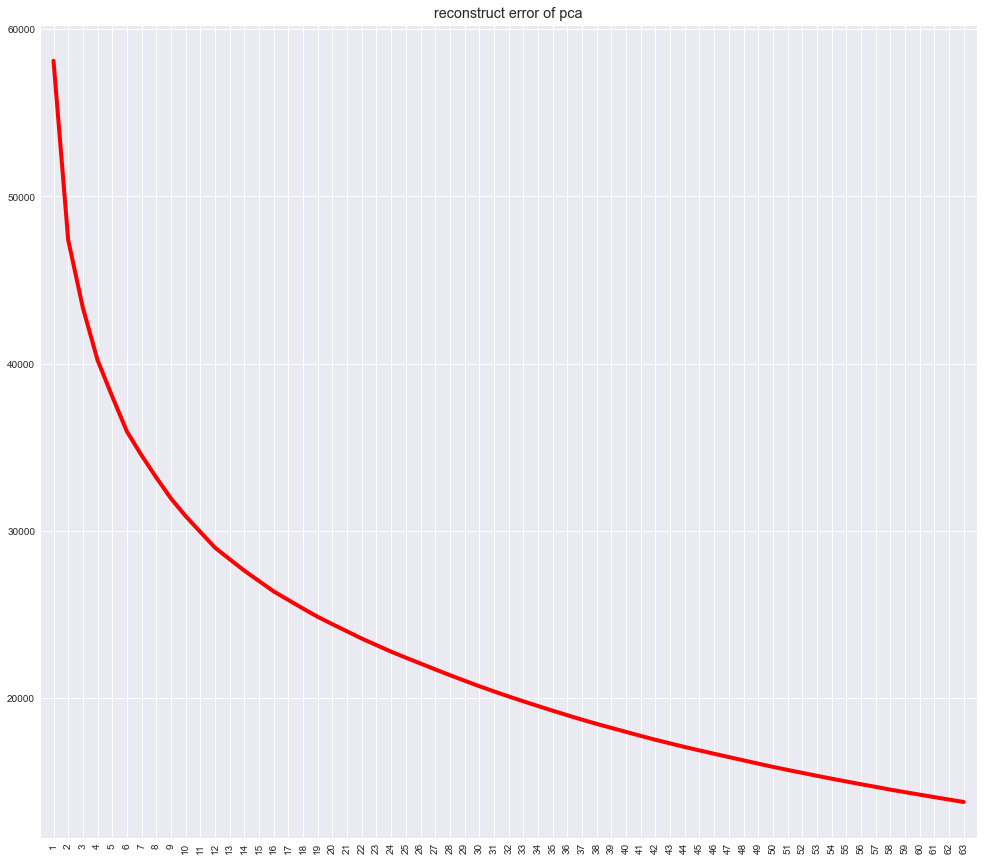

In [22]:
from numpy import linalg as LA
sns.set_style("darkgrid")
plt.figure(facecolor='w')
max_comp=64
start=1
error_record=[]
for i in range(start,max_comp):
    pca = PCA(n_components=i, random_state=42)
    pca2_results = pca.fit_transform(img_r)
    pca2_proj_back=pca.inverse_transform(pca2_results)
    total_loss=LA.norm((img_r-pca2_proj_back),None)
    error_record.append(total_loss)

plt.clf()
plt.figure(figsize=(15,15))
plt.title("reconstruct error of pca")
plt.plot(error_record,'r')
plt.xticks(range(len(error_record)), range(start,max_comp), rotation='vertical')
plt.xlim([-1, len(error_record)])
plt.show()